In [829]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tabpy.tabpy_tools.client import Client

In [830]:
df = pd.read_csv("~/Desktop/TC20/KAG_conversion_data.csv")

In [831]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,conversion_bool
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


In [832]:
df_model = df.drop(labels=['ad_id','Spent', 'Total_Conversion','Approved_Conversion'],axis=1)

In [833]:
df_model.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,conversion_bool
0,916,103916,30-34,M,15,7350,1,1
1,916,103917,30-34,M,16,17861,2,0
2,916,103920,30-34,M,20,693,0,0
3,916,103928,30-34,M,28,4259,1,0
4,916,103928,30-34,M,28,4133,1,1


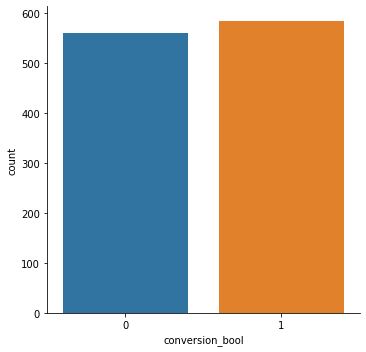

In [834]:
sns.catplot(x='conversion_bool',data=df_model,kind='count')

In [835]:
y = df_model['conversion_bool']
X = df_model.drop(labels=['conversion_bool'],axis=1)

In [836]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [837]:
X_train.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks
204,936,115484,45-49,F,15,3569,0
618,1178,144571,30-34,M,66,10991,0
1140,1178,179979,45-49,F,111,151531,28
478,936,123639,35-39,F,18,784,0
365,936,116252,30-34,F,27,3745,0


In [838]:
enc_age = OneHotEncoder(handle_unknown='ignore')
hot = enc_age.fit_transform(X_train[['age']]).toarray()
age_hot = pd.DataFrame(hot)

In [839]:
X_train.drop(axis=1,labels=['age'],inplace=True)
X_train  = pd.concat([X_train.reset_index(drop=True),age_hot.reset_index(drop=True)], axis=1)

/Users/nmannheimer/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [840]:
X_train.head()

,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,0,1,2,3
0,936,115484,F,15,3569,0,0.0,0.0,0.0,1.0
1,1178,144571,M,66,10991,0,1.0,0.0,0.0,0.0
2,1178,179979,F,111,151531,28,0.0,0.0,0.0,1.0
3,936,123639,F,18,784,0,0.0,1.0,0.0,0.0
4,936,116252,F,27,3745,0,1.0,0.0,0.0,0.0


In [841]:
enc_gen = OneHotEncoder(handle_unknown='ignore')
hot_gender = enc_gen.fit_transform(X_train[['gender']]).toarray()
gender_hot = pd.DataFrame(hot_gender)

In [842]:
X_train = X_train.drop(axis=1,labels=['gender'])
X_train = pd.concat([X_train.reset_index(drop=True),gender_hot.reset_index(drop=True)], axis=1)

In [843]:
X_train.head()

,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,0,1,2,3,0,1
0,936,115484,15,3569,0,0.0,0.0,0.0,1.0,1.0,0.0
1,1178,144571,66,10991,0,1.0,0.0,0.0,0.0,0.0,1.0
2,1178,179979,111,151531,28,0.0,0.0,0.0,1.0,1.0,0.0
3,936,123639,18,784,0,0.0,1.0,0.0,0.0,1.0,0.0
4,936,116252,27,3745,0,1.0,0.0,0.0,0.0,1.0,0.0


In [844]:
gbm = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [845]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [846]:
hot_test = enc_age.transform(X_test[['age']]).toarray()
age_hot_test = pd.DataFrame(hot_test)
hot_gender_test = enc_gen.fit_transform(X_test[['gender']]).toarray()
gender_hot_test = pd.DataFrame(hot_gender_test)

In [847]:
X_test.drop(labels=['age', 'gender'],axis=1, inplace=True)

/Users/nmannheimer/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [848]:
X_test = pd.concat([X_test.reset_index(drop=True),
                      age_hot_test.reset_index(drop=True), 
                      gender_hot_test.reset_index(drop=True)], axis=1)

In [849]:
preds = gbm.predict(X_test)

In [850]:
confusion_matrix(y_test,preds)

array([[130,  52],
       [ 87, 109]])

In [816]:
client = Client('http://localhost:9004/')

In [817]:
def conversion_prediction(xyz_campaign_id,fb_campaign_id, age, gender, interest, Impressions, Clicks):
    X_pred = pd.DataFrame({'xyz_campaign_id': xyz_campaign_id,
                      'fb_campaign_id': fb_campaign_id, 
                      'age': age, 
                      'gender': gender, 
                      'interest':interest, 
                      'Impressions':Impressions, 
                      'Clicks':Clicks})
    print(X_pred.head())
    
    hot_pred = enc_age.transform(X_pred[['age']]).toarray()
    age_hot_pred = pd.DataFrame(hot_pred)
    hot_gender_pred = enc_gen.transform(X_pred[['gender']]).toarray()
    gender_hot_pred = pd.DataFrame(hot_gender_pred)
    
    X_pred.drop(labels=['age', 'gender'],axis=1, inplace=True)
    
    X_pred = pd.concat([X_pred.reset_index(drop=True),
                      age_hot_pred.reset_index(drop=True), 
                      gender_hot_pred.reset_index(drop=True)], axis=1)
    print(X_pred.head())
    X_pred_num = X_pred.to_numpy()
    print(X_pred_num[0])
    
    preds = gbm.predict(X_pred_num).tolist()
    
    return preds

In [818]:
test = [[936],[115484],['45-49'], ['F'],[15], [3569], [0]]

In [819]:
xyz_campaign_id = [936]
fb_campaign_id = [115484] 
age = ['45-49'] 
gender = ['F'] 
interest = [15] 
Impressions = [3569] 
Clicks = [0]

In [820]:
conversion_prediction(xyz_campaign_id,fb_campaign_id, age, gender, interest, Impressions, Clicks)

   xyz_campaign_id  fb_campaign_id    age gender  interest  Impressions  \
0              936          115484  45-49      F        15         3569   

   Clicks  
0       0  
   xyz_campaign_id  fb_campaign_id  interest  Impressions  Clicks    0    1  \
0              936          115484        15         3569       0  0.0  0.0   

     2    3    0    1  
0  0.0  1.0  1.0  0.0  
[9.36000e+02 1.15484e+05 1.50000e+01 3.56900e+03 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00]


[0]

In [827]:
client.deploy('conversion_prediction_test', 
              conversion_prediction, 
              'Takes xyz_campaign_id,fb_campaign_id, age, gender, interest, \
              Impressions, Clicks as predictors as returns a prediction as to \
              whether the customer will convert (1) or not (0)',override = True)

In [828]:
client.query('conversion_prediction_test', xyz_campaign_id,fb_campaign_id, age, gender, interest, Impressions, Clicks)

{'response': [0],
 'version': 1,
 'model': 'conversion_prediction_test',
 'uuid': '9f4a7d50-5df1-4bad-bfa2-a1816c15659c'}